# Question Intent Classifier For Multi-Category Questions - by Saurabh Khandebharad

### Dataset : https://www.kaggle.com/datasets/ananthu017/question-classification/code

In [17]:
# importing necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Loading the training data from a CSV file
df = pd.read_csv("Question_Classification_Dataset.csv", encoding="latin1")

In [3]:
df.head()

,Unnamed: 0,Questions,Category0,Category1,Category2
0,0,How did serfdom develop in and then leave Russ...,DESCRIPTION,DESC,manner
1,1,What films featured the character Popeye Doyle ?,ENTITY,ENTY,cremat
2,2,How can I find a list of celebrities ' real na...,DESCRIPTION,DESC,manner
3,3,What fowl grabs the spotlight after the Chines...,ENTITY,ENTY,animal
4,4,What is the full form of .com ?,ABBREVIATION,ABBR,exp


#### We need only two classes to fit models. So creating two columns out of four:

In [4]:
df['Class'] = df['Category0'].astype(str) + ':' + df['Category2']
df.head()

,Unnamed: 0,Questions,Category0,Category1,Category2,Class
0,0,How did serfdom develop in and then leave Russ...,DESCRIPTION,DESC,manner,DESCRIPTION:manner
1,1,What films featured the character Popeye Doyle ?,ENTITY,ENTY,cremat,ENTITY:cremat
2,2,How can I find a list of celebrities ' real na...,DESCRIPTION,DESC,manner,DESCRIPTION:manner
3,3,What fowl grabs the spotlight after the Chines...,ENTITY,ENTY,animal,ENTITY:animal
4,4,What is the full form of .com ?,ABBREVIATION,ABBR,exp,ABBREVIATION:exp


In [5]:
df  = df.drop(columns = ['Category0', 'Category1', 'Category2'])
df.head()

,Unnamed: 0,Questions,Class
0,0,How did serfdom develop in and then leave Russ...,DESCRIPTION:manner
1,1,What films featured the character Popeye Doyle ?,ENTITY:cremat
2,2,How can I find a list of celebrities ' real na...,DESCRIPTION:manner
3,3,What fowl grabs the spotlight after the Chines...,ENTITY:animal
4,4,What is the full form of .com ?,ABBREVIATION:exp


In [6]:
df = df.drop(df.columns[0],axis = 1)
df.head()

,Questions,Class
0,How did serfdom develop in and then leave Russ...,DESCRIPTION:manner
1,What films featured the character Popeye Doyle ?,ENTITY:cremat
2,How can I find a list of celebrities ' real na...,DESCRIPTION:manner
3,What fowl grabs the spotlight after the Chines...,ENTITY:animal
4,What is the full form of .com ?,ABBREVIATION:exp


In [7]:
# Preparing the data for training
col = ['Class', 'Questions']
y = df[col]
y = y[pd.notnull(y['Questions'])]
y.columns = ['Class', 'Questions']
y['category_id'] = y['Class'].factorize()[0]
category_id_df = y[['Class', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Class']].values)

#### Training and comparing different algorithms

In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(y.Questions).toarray()
labels = y.category_id

X_train, X_test, y_train, y_test = train_test_split(y['Questions'], y['Class'], random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [9]:
# Naive Bayes classifier
clf_nb = MultinomialNB().fit(X_train_tfidf, y_train)
X_test_counts_nb = count_vect.transform(X_test)
X_test_tfidf_nb = tfidf_transformer.transform(X_test_counts_nb)
y_pred_nb = clf_nb.predict(X_test_tfidf_nb)
print("Naive Bayes Classifier:")
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Naive Bayes Classifier:
Accuracy: 0.37417461482024944


In [10]:
# K-Nearest Neighbors (KNN) classifier
clf_knn = KNeighborsClassifier().fit(X_train_tfidf, y_train)
X_test_counts_knn = count_vect.transform(X_test)
X_test_tfidf_knn = tfidf_transformer.transform(X_test_counts_knn)
y_pred_knn = clf_knn.predict(X_test_tfidf_knn)
print("K-Nearest Neighbors (KNN) Classifier:")
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.5788701393983859


In [11]:
# Decision Tree classifier
clf_dt = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
X_test_counts_dt = count_vect.transform(X_test)
X_test_tfidf_dt = tfidf_transformer.transform(X_test_counts_dt)
y_pred_dt = clf_dt.predict(X_test_tfidf_dt)
print("Decision Tree Classifier:")
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Decision Tree Classifier:
Accuracy: 0.6170212765957447


In [12]:
# Logistic Regression classifier
clf_lr = LogisticRegression().fit(X_train_tfidf, y_train)
X_test_counts_lr = count_vect.transform(X_test)
X_test_tfidf_lr = tfidf_transformer.transform(X_test_counts_lr)
y_pred_lr = clf_lr.predict(X_test_tfidf_lr)
print("Logistic Regression Classifier:")
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Logistic Regression Classifier:
Accuracy: 0.6375641966250917


In [13]:
# Support Vector Machine (SVM) classifier
clf_svm = SVC().fit(X_train_tfidf, y_train)
X_test_counts_svm = count_vect.transform(X_test)
X_test_tfidf_svm = tfidf_transformer.transform(X_test_counts_svm)
y_pred_svm = clf_svm.predict(X_test_tfidf_svm)
print("Support Vector Machine (SVM) Classifier:")
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Support Vector Machine (SVM) Classifier:
Accuracy: 0.652971386647102


In [14]:
# Random Forest classifier
clf_rf = RandomForestClassifier().fit(X_train_tfidf, y_train)
X_test_counts_rf = count_vect.transform(X_test)
X_test_tfidf_rf = tfidf_transformer.transform(X_test_counts_rf)
y_pred_rf = clf_rf.predict(X_test_tfidf_rf)
print("Random Forest Classifier:")
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Random Forest Classifier:
Accuracy: 0.7028613352898019


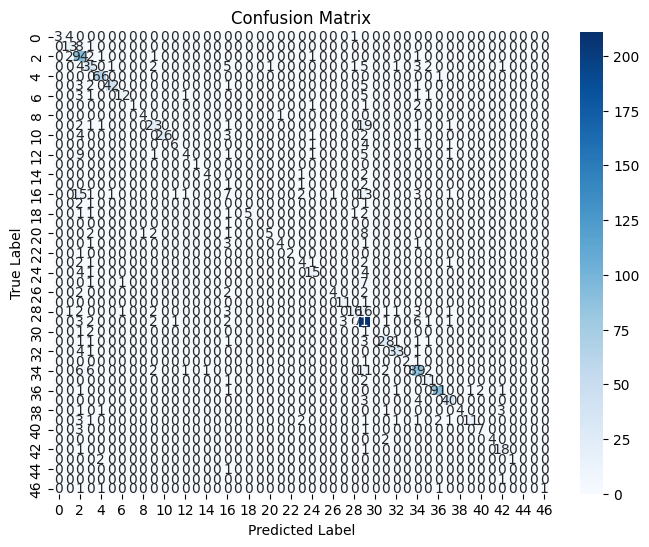

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Displaying Confusion Matrix of Random Forest Classifier
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### We'll be using Random Forest Classifier for prediction due to its highest accuracy

In [18]:
def predict_category(question):
    intent = clf_rf.predict(count_vect.transform([question]))
    intent = str(intent).strip("['']")
    return intent

# Get user input and predict the category
user_question = input("Enter your Question: ")
predicted_category = predict_category(user_question)
print("Predicted Category:", predicted_category)

Enter your Question:  Where is Taj Mahal?


Predicted Category: LOCATION:other


#### This is the highest accuracy we can achieve with the basic models (without Neural networks).

#### The accuracy of the models will increase significantly when the data size is substantially increased.